'\nВывод Фины молодцы а Швейцария ушла с топ 5 стран  \n'

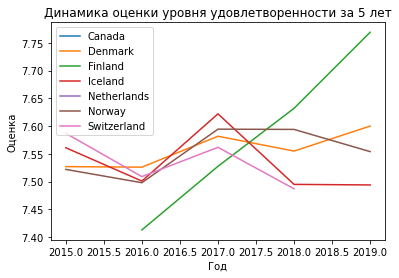

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams





append_data = []
for year in range(2015,2020):
    if year < 2018:
        df = pd.read_csv(f"{year}.csv", header=None, usecols=[0,2,3,5,7,8,9,10], skiprows=[0],
                        names=[ "Country", "Rank", "Score", "GDP", "Life expectancy", "Freedom", "Corruption", "Generosity"])
        df["Rank"] = df["Rank"].astype(np.int64)
        df = df[[ "Rank", "Country", "Score", "GDP", "Life expectancy", "Freedom", "Generosity", "Corruption"]]
    else:    
        df = pd.read_csv(f"{year}.csv", header=None, usecols=[0,1,2,3,5,6,7,8], skiprows=[0],
                    names=["Rank", "Country", "Score", "GDP", "Life expectancy", "Freedom", "Generosity", "Corruption" ])
    df["Year"] = year
    append_data.append(df)
happy_df = pd.concat(append_data) 
'''
Выбрать 5 стран из топа за 5 лет
'''
happy_df_5 = happy_df.groupby("Year").head(5)
happy_score = happy_df_5.pivot_table(index='Year', 
                      columns='Country', 
                      values='Score', 
                      aggfunc=sum)

ax = happy_score.plot(title='Динамика оценки уровня удовлетворенности за 5 лет')
ax.set(xlabel="Год", ylabel="Оценка")
ax.legend(loc='upper left')

'''
Вывод Фины молодцы а Швейцария ушла с топ 5 стран  
'''


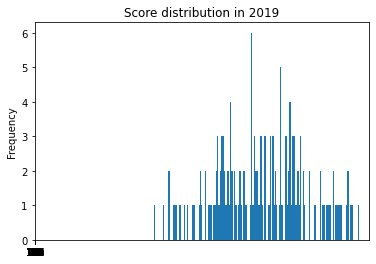

In [30]:
'''
В большинстве стран уровень удовлетворенности ближе к среднему. 
Оценки делятся на группы, видимо для стран объединённых
общим признаком, например странны Евросоюза, расположение и т.д
Есть несколько больших групп стран с одинаковым уровнем удовлетворенности

'''

happy_df_plot = happy_df.copy(True)
happy_df_plot["Score"] = 10000 * happy_df_plot["Score"]
happy_df_plot.loc[happy_df.Year == 2019]["Score"].plot(kind='hist', 
                   bins=156,
                   title='Score distribution in 2019',
                   xticks=range(1, 156))


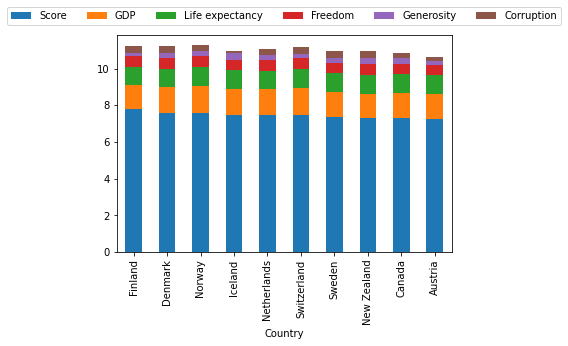

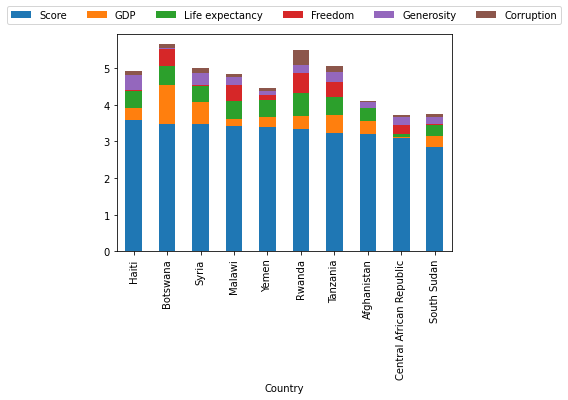

In [31]:
'''
У всех стран из топ 10 основные показатели на примерно одном уровне
В 10 странах из конца списка, интересно что Ботсвана при общей сбалансированности показателей имеет такую низкую оценку,
возможно хоть и ВВП более высокий, но блага неравномерно распределены среди населения и люди в массе своей живут бедно
'''

happy_bar = happy_df.loc[happy_df.Year == 2019].drop(['Rank','Year'], axis=1).groupby(["Country"]).sum().sort_values(by='Score', ascending=False)
ax = happy_bar.head(10).plot(kind='bar', stacked=True)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.show()

happy_bar = happy_df.loc[happy_df.Year == 2019].drop(['Rank','Year'], axis=1).groupby(["Country"]).sum().sort_values(by='Score', ascending=False)
ax = happy_bar.tail(10).plot(kind='bar', stacked=True)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=6)
plt.show()

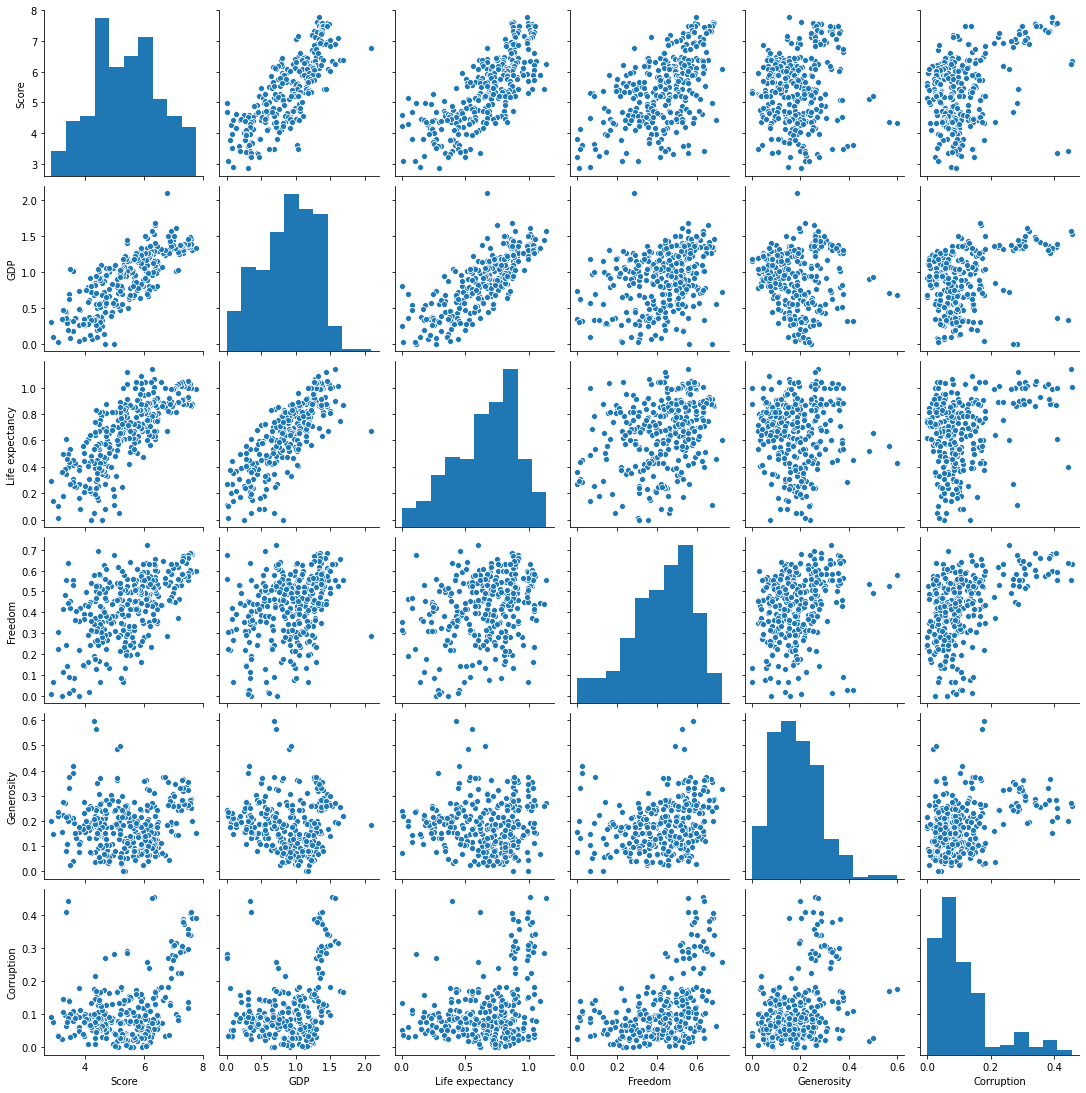

In [26]:
'''
Общая оценка наиболее колируется с ВВП и продолжительностью жизни
Сильная связь между ВВП и продолжительностью жизни
Интересно что значения по продолжительности жизни и свободе выбора имеют похожее распределение, хотя явной корреляции нет
возможно есть связь через ВВП, хотя вроде  ВВП и свобода  не так явно корректируются. 

'''


sns.pairplot( happy_df.loc[happy_df.Year.isin([2018,2019])][['Score', 'GDP', 'Life expectancy', 'Freedom', "Generosity", "Corruption"]])